<a href="https://colab.research.google.com/github/piserushikesh/Gen_AI_Training/blob/main/Case_Study_4_Rushikesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('outbreak_detect.csv')


In [15]:
dataset.isnull().sum()

maxTemp        0
minTemp        0
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       0
dtype: int64

In [16]:
dataset.head(5)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes


# Encode target variable 'Outbreak' as binary (0 and 1)

In [17]:
dataset['Outbreak'] = dataset['Outbreak'].map({'Yes':1,'No':0})

In [18]:
dataset.head(5)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,0
1,34,23,83.27,15.22,10717,677,1
2,40,23,50.74,0.00,1257,127,0
3,34,24,59.16,9.06,4198,211,0
4,34,27,73.23,0.00,11808,712,1


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
print(X)

[[2.9000e+01 1.8000e+01 4.9740e+01 0.0000e+00 2.1560e+03 1.1200e+02]
 [3.4000e+01 2.3000e+01 8.3270e+01 1.5220e+01 1.0717e+04 6.7700e+02]
 [4.0000e+01 2.3000e+01 5.0740e+01 0.0000e+00 1.2570e+03 1.2700e+02]
 [3.4000e+01 2.4000e+01 5.9160e+01 9.0600e+00 4.1980e+03 2.1100e+02]
 [3.4000e+01 2.7000e+01 7.3230e+01 0.0000e+00 1.1808e+04 7.1200e+02]
 [3.1000e+01 2.4000e+01 8.8770e+01 4.1400e+01 1.0881e+04 6.4800e+02]
 [3.3000e+01 2.4000e+01 7.7940e+01 2.3880e+01 8.8300e+03 4.5900e+02]
 [3.1000e+01 2.4000e+01 8.4570e+01 1.1150e+01 9.6930e+03 4.8200e+02]
 [3.6000e+01 2.4000e+01 5.3400e+01 2.1200e+00 9.3100e+03 5.4900e+02]
 [3.2000e+01 2.3000e+01 5.7500e+01 0.0000e+00 1.3154e+04 8.3800e+02]
 [3.4000e+01 1.8000e+01 5.9400e+01 0.0000e+00 2.1970e+03 1.3600e+02]
 [4.2000e+01 2.4000e+01 4.9430e+01 2.1900e+00 3.3620e+03 2.1300e+02]
 [4.5000e+01 3.2000e+01 3.4740e+01 3.8000e-01 4.1600e+02 2.6000e+01]
 [4.3000e+01 2.8000e+01 6.9070e+01 4.6500e+00 7.5140e+03 4.1000e+02]
 [3.3000e+01 2.3000e+01 8.0970e+01

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
print(X_train)

[[4.3000e+01 2.8000e+01 6.9070e+01 4.6500e+00 7.5140e+03 4.1000e+02]
 [3.3000e+01 2.2000e+01 7.3710e+01 1.7500e+00 9.2330e+03 2.1200e+02]
 [4.0000e+01 2.7000e+01 6.3970e+01 0.0000e+00 1.1169e+04 7.7600e+02]
 [3.6000e+01 2.4000e+01 5.3400e+01 2.1200e+00 9.3100e+03 5.4900e+02]
 [3.3000e+01 2.4000e+01 7.7940e+01 2.3880e+01 8.8300e+03 4.5900e+02]
 [3.9000e+01 2.5000e+01 4.7520e+01 0.0000e+00 8.1310e+03 3.1200e+02]
 [3.4000e+01 2.7000e+01 7.3230e+01 0.0000e+00 1.1808e+04 7.1200e+02]
 [4.0000e+01 2.3000e+01 5.0740e+01 0.0000e+00 1.2570e+03 1.2700e+02]
 [3.1000e+01 2.4000e+01 8.8770e+01 4.1400e+01 1.0881e+04 6.4800e+02]
 [3.6000e+01 2.6000e+01 7.2780e+01 3.5400e+00 5.1380e+03 2.1300e+02]
 [3.2000e+01 2.3000e+01 5.7500e+01 0.0000e+00 1.3154e+04 8.3800e+02]
 [3.1000e+01 2.4000e+01 8.4570e+01 1.1150e+01 9.6930e+03 4.8200e+02]
 [3.1000e+01 2.3000e+01 7.3350e+01 4.9700e+00 1.0659e+04 6.1200e+02]
 [3.4000e+01 2.4000e+01 5.9160e+01 9.0600e+00 4.1980e+03 2.1100e+02]
 [2.9000e+01 1.8000e+01 4.9740e+01

In [24]:
print(y_train)

[0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0]


In [25]:
print(X_test)

[[4.2000e+01 2.4000e+01 4.9430e+01 2.1900e+00 3.3620e+03 2.1300e+02]
 [3.4000e+01 1.8000e+01 5.9400e+01 0.0000e+00 2.1970e+03 1.3600e+02]
 [3.0000e+01 2.2000e+01 7.8800e+01 3.1200e+00 1.1265e+04 4.0400e+02]
 [3.3000e+01 2.3000e+01 8.0970e+01 6.9200e+00 1.0990e+04 3.9000e+02]
 [3.0000e+01 2.3000e+01 8.6810e+01 7.2100e+00 9.0410e+03 4.1800e+02]
 [3.4000e+01 2.3000e+01 8.3270e+01 1.5220e+01 1.0717e+04 6.7700e+02]]


In [26]:
print(y_test)

[0 0 1 1 0 1]


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
print(X_train)

[[ 1.72848324  1.18838487  0.22364572 -0.19779693 -0.03722865 -0.01640495]
 [-0.49759366 -0.90153335  0.53488732 -0.47041054  0.42670857 -0.84057004]
 [ 1.06066017  0.84006517 -0.11845174 -0.63491875  0.94921146  1.50705173]
 [ 0.17022941 -0.20489394 -0.82746548 -0.4356288   0.44748994  0.56217559]
 [-0.49759366 -0.20489394  0.81862698  1.60991331  0.31794377  0.1875551 ]
 [ 0.83805248  0.14342576 -1.22188372 -0.63491875  0.12929216 -0.42432504]
 [-0.27498597  0.84006517  0.50268992 -0.63491875  1.1216698   1.24065493]
 [ 1.06066017 -0.55321365 -1.00589278 -0.63491875 -1.72591695 -1.19437828]
 [-0.94280904 -0.20489394  1.54508098  3.25687552  0.87148376  0.97425814]
 [ 0.17022941  0.49174546  0.47250485 -0.30214214 -0.67848219 -0.83640759]
 [-0.72020135 -0.55321365 -0.55244596 -0.63491875  1.48493885  1.76512363]
 [-0.94280904 -0.20489394  1.26335367  0.41323357  0.55085699  0.28329145]
 [-0.94280904 -0.55321365  0.51073927 -0.16771543  0.81156865  0.82440994]
 [-0.27498597 -0.20489394

In [29]:
print(X_test)

[[ 1.50587555 -0.20489394 -1.09376487 -0.42904848 -1.15780302 -0.83640759]
 [-0.27498597 -2.29481217 -0.42499789 -0.63491875 -1.47222237 -1.15691623]
 [-1.16541673 -0.90153335  0.876314   -0.34162411  0.97512069 -0.04137965]
 [-0.49759366 -0.55321365  1.02187311  0.01559372  0.90090153 -0.09965395]
 [-1.16541673 -0.55321365  1.41360823  0.04285508  0.3748901   0.01689465]
 [-0.27498597 -0.55321365  1.17615235  0.79583267  0.82722215  1.09496918]]


## Training the Logistic Regression model on the Training set

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [31]:
print(classifier.predict(sc.transform([[33,20,80.27,16.01,10000,600]])))

[1]


## Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3 0]
 [2 1]]


0.6666666666666666

## Visualising the Training set results

## Visualising the Test set results

<ipython-input-14-96b67a383660>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


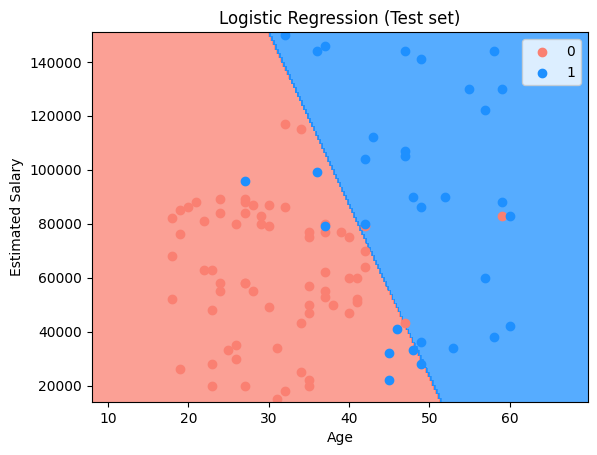

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()